<a href="https://colab.research.google.com/github/Future-Denisovan/Mesopotamia/blob/main/Aguiar_Mini_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

In this exercise we will analyze the setting of Swain vs Alabama and try to assess the decision of the Supreme Court.

The underlying belief is that the jury was selected at random from the eligible jury pool. How can we test this? 

Let's first try to formulate this problem statistically. The underlying eligible jurors are our population. If things are truly random, our 100 person jury is a sample from this population. The random variable we are interested in, $X$, is the number of this black jurors. 

We can now try to answer the following question - what's the probability of getting a jury pool with 8 or less black men, on it if we selected random? Mathematically this is the same as asking, what is the probability that $X\leq 8$?

In lecture 1, we learned that we can repeatedly sample from an underlying population and use that to build a sampling distribution on $X$. So let's try that here. In the following code block, I have provided a function ``get_jury`` that when run returns an array of size 100 of 0's and 1's. The 100 entries represent the 100 jurors, and getting a 1 means that a given juror is black. 

You don't have to understand the implementation of ``get_jury``, but do run the following code block to understand it's output.

In [54]:
def get_jury():
    return [int(np.random.rand() < .26) for i in range(100)]
jury_sample = get_jury()
print(jury_sample)

[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


In the following code block, given a ``jury_sample``, compute the number of 1's in the array. Since the jury is drawn randomly from the population, each time you run the code block, you will get a different answer (make sure you use a print statement). Anecdotally, how often do you see a number less than 8?


In [55]:
jury_sample = get_jury()
count = sum(jury_sample)
print(count)

27


Now that we can simulate a random jury pool and count the number of black jurors in the pool, we can build the sampling distribution of $X$. Recall from class that the sampling distribution is just the distribution of possible values of $X$ if we can repeatedly sample from the underlying population. 

Using the ``sns.distplot`` command from the in-class exercise, simulate 100000 different jury pools and plot the resulting sampling distribution (it will take a minute or two).

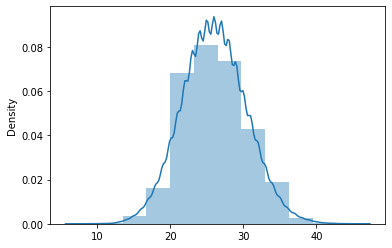

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



counts_array = []
for i in range(100000):
    jury_sample = get_jury()
    count = sum(jury_sample)
    counts_array.append(count)
# Now plot a histogram
sns.distplot(a=counts_array, bins=12)#Your Turn: Plot a histogram of counts_array 
plt.show()

It remains to answer the question, "What is the probability $X\leq 8$?". Compute the proportion of sample counts from the previous code block that are less than 8. (To check yourself, compare to the histogram in the previous block.)


In [91]:
# Your-turn: proportion of counts that are less then or equal to 8
# Calculate Proportion Function
# Array, Int->Float
# Takes a 2D array and Integer, with rows of the array representing a random sample, and
# columns representing the number of observations of that sample. The integer is user 
# defined, and is the desired percentage of samples with less then or equal proportion, 
# returns the probability in float form of the probability of that desired percentage.
####Template######
#def calprob(x): # 
#  answer=sum(x) #
#  return answer #
##################

def calprob(x,p): 
  p = p+1 #Because equal to or less than and 
  per=0
  tot_obs=np.shape(x)[0]#Total number of rows in array
  tot_cri=0 #Total rows matching the criteria (less than the integer we put in p)
  for i in x:
    cntperrow=np.sum(i) 
    if cntperrow < p:
      tot_cri = tot_cri + 1
  per=tot_cri/tot_obs
  return per
  

#Error checking
a = np.array([[1,0,1,0], #First test array
             [1,0,1,0]])
p1 = 0 #What probability is x=<p1?
testary=calprob(a,p1)
if testary < 1: #Check 
  print("test 1 passed!")
else:
  print("test 1 failed")

#Find the answer
calprob(counts_array,8)




test 1 passed!


1e-05

Ok, now we can assess our hypothesis that the jury was a random draw from the population. Based on the above what can you conclude? Does the jury pool look like a random sample from the population? 

This method of formulating hypothesis, a corresponding statistic (eg the number of black jurors), simulating the data and making a conclusion is known as "Hypothesis Testing". If you have seen hypothesis testing before, what is another name for the probability we computed above?

Put your answer in the text block below (you may have to double click to make it editable). Print a pdf of this from file, and save a copy of this exercise to your drive or download it a an ``*.ipynb``

Your answer here:

1) The jury population does not look like a random draw at all, the possibility appears to be the same as zero, sometimes I get zero and other times I get 1e-05. 

We will conduct a left-tailed hypothesis test.
Our initial assumption for our two competing hypotheses -- the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$). Here, our hypotheses are:

$H_0$: The jury was a random draw of the population, $Mu$ > .01

$H_A$: The jury was not a random draw of the population, $Mu$ < .01

The probability is also known as the P-value, it is the probability of making a Type I error, if the P-value is less than our critical value of .01 than we can reject the null(jury was a random draw). 

When the proportion of eligible blacks is 26% in the population, having 8 black jurors selected out of a random 100 jurors is has a 1e-05 chance of occuring. We can reject the null and conclude that the jury was not a random draw.